# Data Understanding
This notebook use diamonds dataset in order to demonstrate and exercise common data understanding tasks.
The notbook includes:
* [Diamonds dataset description](#dataset_description)
* [Data loading and metadata extraction](#data_loading)
* [Basic descriptive statistics](#basic_descriptive_statistics)
* [Statistical measures](#statistical_measures)
    * [Entropy](#entropy)
    * [Mutual Information](#mutual_information)
    * [Correlation](#correlation)
* [Data visualization](#data_visualization)

---

In [2]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import metrics

## <a name="dataset_description"></a>Diamonds Dataset Description:

Each row represent a diamond. It's properties, and it's price.
In most cases we try to build a supervised learning algorithm in order to assess a diamond price based on it's properties.

A diamond is described by the following properties:
* carat -Carat weight of the diamond
* cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
* color - Color of the diamond, with D being the best and J the worst
* clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* depth - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
* table - table%: The width of the diamond's table expressed as a percentage of its average diameter
* price - The price of the diamond
* x - Length mm
* y - Width mm
* z - Depth mm

## <a name="data_loading"></a>Data Loading

Read csv file into pandas dataframe. present few rows with the "head" function.

In [2]:
diamonds = pd.read_csv('../Data/diamonds.csv')
diamonds.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Diamonds info will describe each field and the general pandas object that we use.

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Describing the type of each field

In [4]:
print("List of diamonds columns: {}".format(diamonds.columns.values))
print()
print(diamonds.dtypes)

List of diamonds columns: ['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


Finding the "shape" of our dataset. Shape of a dataframe describe the number of rows and columns of a given dataframe.

In [5]:
print("dataset has",diamonds.shape[0],"rows and",diamonds.shape[1],"columns")
diamonds.shape

dataset has 53940 rows and 10 columns


(53940, 10)

## <a name="basic_descriptive_statistics"></a>Basic Descriptive Statistics

The "describe" function will give us common numeric distribution metrics on each numeric column

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


"value_counts" will give us the distribution of a given categorical column

In [7]:
cat_columns = diamonds.select_dtypes(include='object').columns
print(cat_columns)
for curr_column in cat_columns:
    print("{} column distribution:".format(curr_column))
    print(diamonds[curr_column].value_counts())
    print()

Index(['cut', 'color', 'clarity'], dtype='object')
cut column distribution:
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

color column distribution:
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

clarity column distribution:
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



Detecting how many "null" we have in each column

In [8]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no nulls however we can see that some records have 0 value in one of their axis (x\y\z)

In [9]:
print("Total number of records with x\y\z discrepencies: {}".format(len(diamonds[(diamonds.x == 0) | (diamonds.y == 0) | (diamonds.z == 0)])))

Total number of records with x\y\z discrepencies: 20


Let's remove these records.

In [10]:
diamonds = diamonds.drop(diamonds.loc[diamonds.x <= 0].index)
diamonds = diamonds.drop(diamonds.loc[diamonds.y <= 0].index)
diamonds = diamonds.drop(diamonds.loc[diamonds.z <= 0].index)
print("removed!")

removed!


Let's check again weather we have records with 0 value in one of their axis (x\y\z)

In [11]:
print(len(diamonds[(diamonds.x == 0) | (diamonds.y == 0) | (diamonds.z == 0)]))

0


## <a name="statistical_measures"></a>Statistical Measures


### <a name="entropy"></a>Entropy

Entropy calculation for a categorical column, require computing probabilities first

In [12]:
p_data= diamonds["color"].value_counts()/len(diamonds) # calculates the probabilities
print(p_data)
entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
print(entropy)

G    0.209273
E    0.181695
F    0.176892
H    0.153895
D    0.125631
I    0.100538
J    0.052077
Name: color, dtype: float64
1.8770777397584308


Entropy calculation for a numeric column. Require discritization first

In [13]:
disc = pd.qcut(diamonds["price"], 100)
print(disc)
p_data= disc.value_counts()/len(disc) # calculates the probabilities
entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
print(entropy)

0        (325.999, 429.0]
1        (325.999, 429.0]
2        (325.999, 429.0]
3        (325.999, 429.0]
4        (325.999, 429.0]
5        (325.999, 429.0]
6        (325.999, 429.0]
7        (325.999, 429.0]
8        (325.999, 429.0]
9        (325.999, 429.0]
10       (325.999, 429.0]
11       (325.999, 429.0]
12       (325.999, 429.0]
13       (325.999, 429.0]
14       (325.999, 429.0]
15       (325.999, 429.0]
16       (325.999, 429.0]
17       (325.999, 429.0]
18       (325.999, 429.0]
19       (325.999, 429.0]
20       (325.999, 429.0]
21       (325.999, 429.0]
22       (325.999, 429.0]
23       (325.999, 429.0]
24       (325.999, 429.0]
25       (325.999, 429.0]
26       (325.999, 429.0]
27       (325.999, 429.0]
28       (325.999, 429.0]
29       (325.999, 429.0]
               ...       
53910    (2681.0, 2777.0]
53911    (2681.0, 2777.0]
53912    (2681.0, 2777.0]
53913    (2681.0, 2777.0]
53914    (2681.0, 2777.0]
53915    (2681.0, 2777.0]
53916    (2681.0, 2777.0]
53917    (26

### <a name="mutual_information"></a>Mututal infromation

Giving two variables it will compute their mautual information

In [14]:
print(metrics.mutual_info_score(diamonds["color"], diamonds["price"]))
#print(metrics.adjusted_mutual_info_score(diamonds["color"], diamonds["price"]))
#print(metrics.normalized_mutual_info_score(diamonds["color"], diamonds["price"]))

print(metrics.mutual_info_score(diamonds["x"], diamonds["price"]))
#print(metrics.adjusted_mutual_info_score(diamonds["y"], diamonds["price"]))
#print(metrics.normalized_mutual_info_score(diamonds["y"], diamonds["price"]))

0.8493282141080026
4.004678976147534


### <a name="correlation"></a>Correlation

Compute correlation matrix (will work only on numeric columns)

In [15]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


Plot the matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

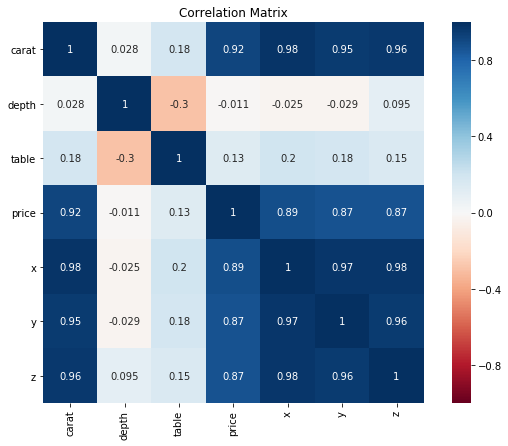

In [16]:
plt.subplots(figsize=(10,7))
corr_matrix = diamonds.corr()
corr = sns.heatmap(corr_matrix, square=True, annot=True, vmax=1.0, vmin=-1.0, cmap="RdBu").set_title('Correlation Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)


## <a name="data_visualization"></a>Data Visualization
In this section we will use matplotlib and seaborn packages to plot basic common plot while doing data analysis

Distribution plot for a numeric variable. Can see the right long tail for "price"

Mean Diamond Price = 3930.993230712166
Median Diamond Price = 2401.0


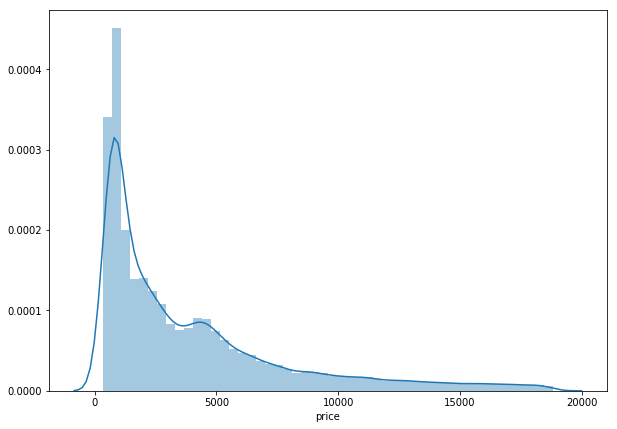

In [17]:
print("Mean Diamond Price = " + str(np.mean(diamonds.price)))
print("Median Diamond Price = " + str(np.median(diamonds.price)))
plt.subplots(figsize=(10,7))
sns.distplot(diamonds.price, label="Price")

Distribution plot for a categorical variable

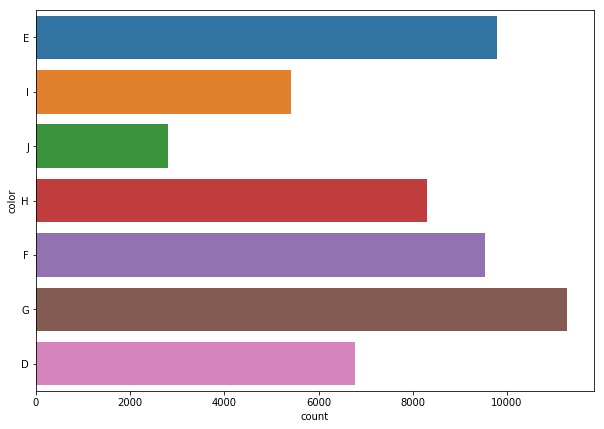

In [18]:
plt.subplots(figsize=(10,7))
sns.countplot(y = diamonds.color)

Analyzing a numeric variable distrbution per a categorical variable values using boxplots.

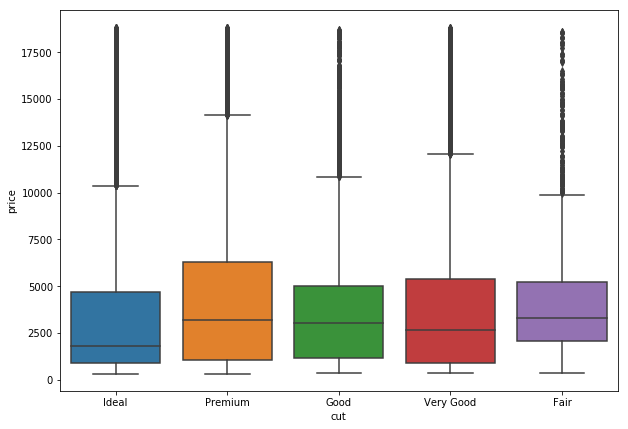

In [19]:
plt.subplots(figsize=(10,7))
sns.boxplot(x="cut", y="price", data=diamonds);

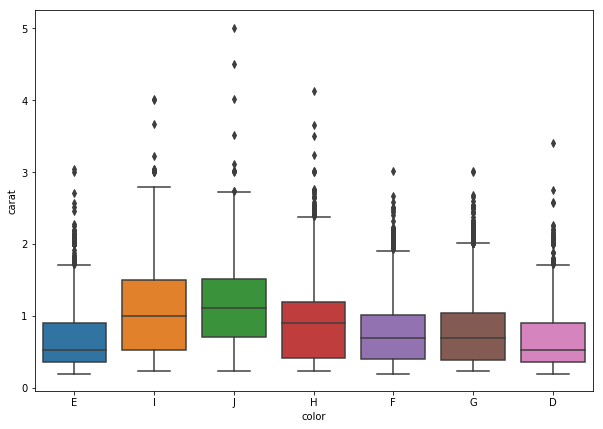

In [20]:
plt.subplots(figsize=(10,7))
sns.boxplot(x="color", y="carat", data=diamonds);

In [21]:
e_d = diamonds[diamonds.color == "I"]
np.median(e_d['price'])

3730.0

Analyzing a numeric variable distrbution per a categorical variable values using density plots.

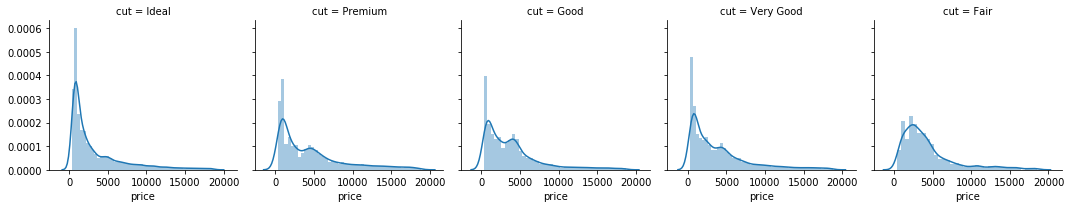

In [22]:
g=sns.FacetGrid(diamonds, col='cut')
g.map(sns.distplot, "price")

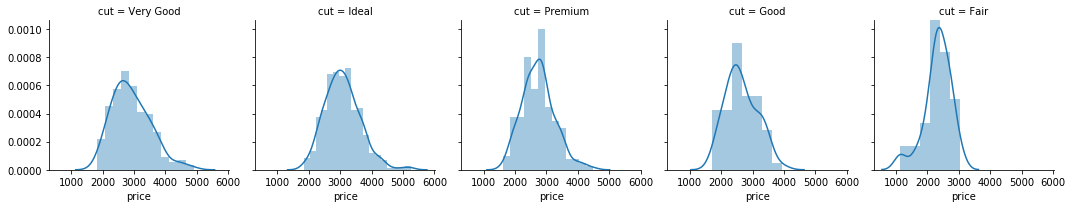

In [23]:
g=sns.FacetGrid(diamonds[(diamonds['carat'] < 0.8) & (diamonds['carat']>0.75)], col='cut')
g.map(sns.distplot, "price")

In [24]:
d = diamonds[(diamonds['carat'] < 0.8) & (diamonds['carat']>0.75)]
d.shape

(844, 10)

Analyzing two numeric variables. Plotting an advanced scatter plot

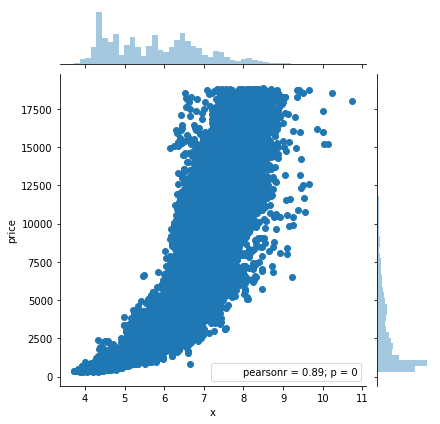

In [25]:
sns.jointplot(x="x", y="price", data=diamonds)
#sns.jointplot(x="x", y="price", data=diamonds, kind="kde")

Analyze automatically all numerical variables pairwaise combinations

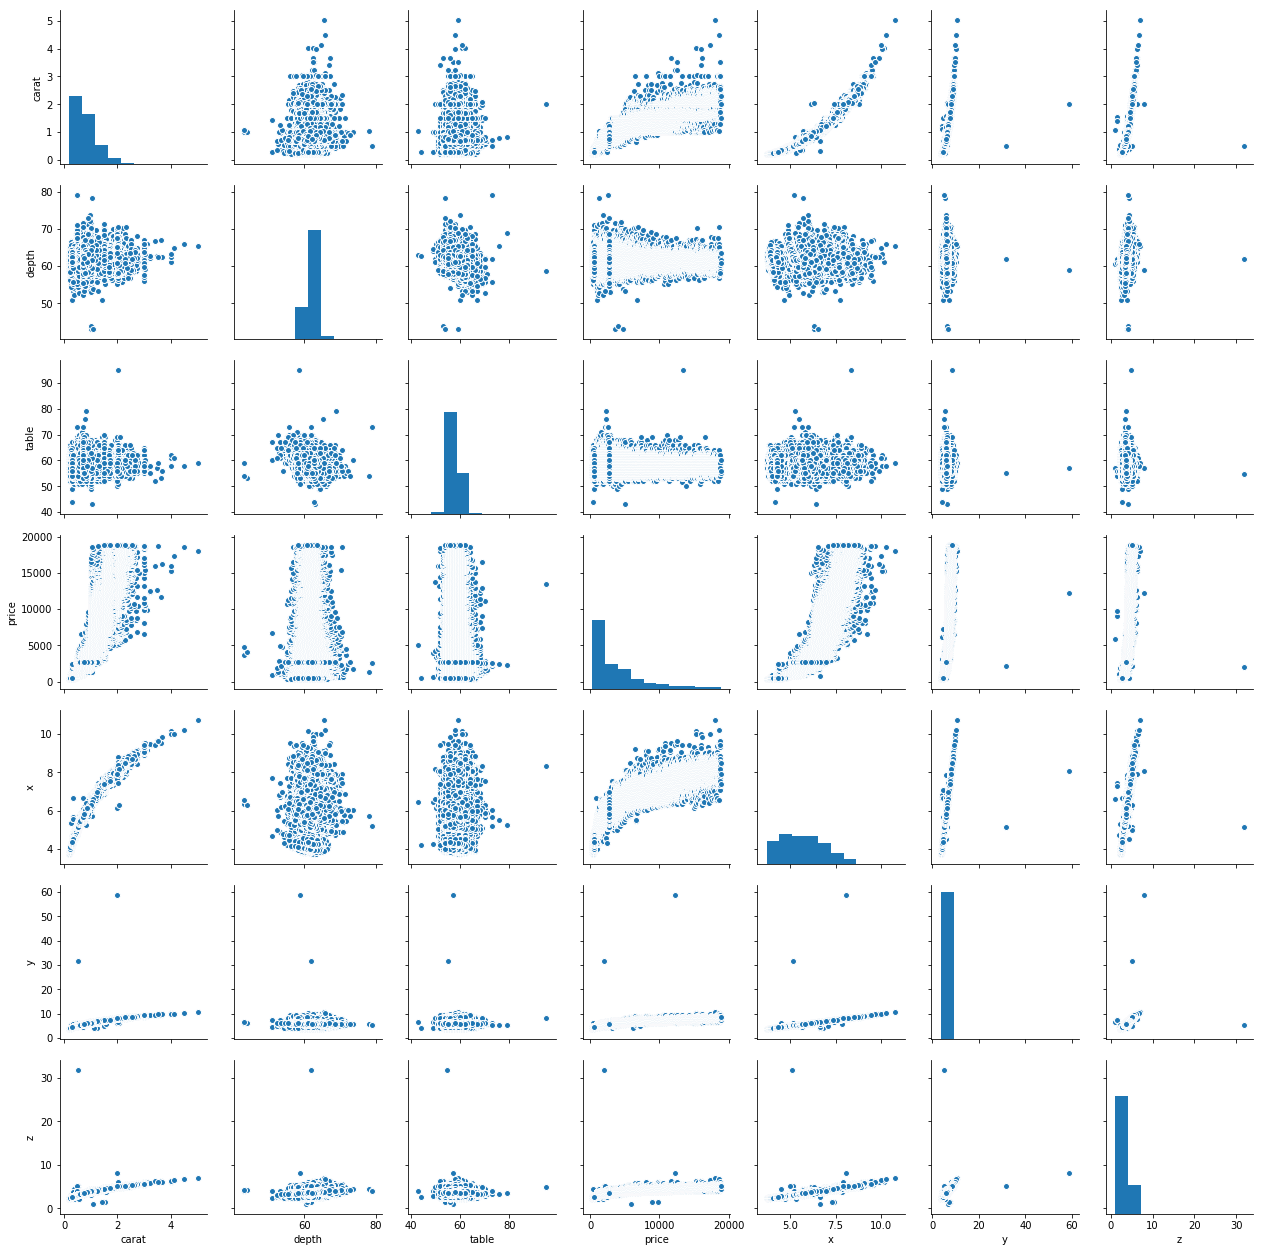

In [26]:
sns.pairplot(diamonds);